# Implementing Linear Regression By Using Gradient Descent

In [1]:
#Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading the data
df = pd.read_csv('challenge_dataset.txt',sep = ',',names = ['X1','Y'])

In [3]:
#The first five rows from the data
df.head()

,X1,Y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
#The information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      97 non-null     float64
 1   Y       97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [5]:
#Statastical description of the data
df.describe()

,X1,Y
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [6]:
#Inserting X0 into the data frame
df.insert(0,'X0',1)

In [7]:
df.head()

,X0,X1,Y
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [117]:
#Splitting the data to x and y
cols = df.shape[1]
x = df.iloc[:,0:cols-1]
y = df.iloc[:,cols-1:cols]


In [118]:
#Converting x,y into matrices
x = np.matrix(x.values)
y = np.matrix(y.values)

In [119]:
x

matrix([[ 1.    ,  6.1101],
        [ 1.    ,  5.5277],
        [ 1.    ,  8.5186],
        [ 1.    ,  7.0032],
        [ 1.    ,  5.8598],
        [ 1.    ,  8.3829],
        [ 1.    ,  7.4764],
        [ 1.    ,  8.5781],
        [ 1.    ,  6.4862],
        [ 1.    ,  5.0546],
        [ 1.    ,  5.7107],
        [ 1.    , 14.164 ],
        [ 1.    ,  5.734 ],
        [ 1.    ,  8.4084],
        [ 1.    ,  5.6407],
        [ 1.    ,  5.3794],
        [ 1.    ,  6.3654],
        [ 1.    ,  5.1301],
        [ 1.    ,  6.4296],
        [ 1.    ,  7.0708],
        [ 1.    ,  6.1891],
        [ 1.    , 20.27  ],
        [ 1.    ,  5.4901],
        [ 1.    ,  6.3261],
        [ 1.    ,  5.5649],
        [ 1.    , 18.945 ],
        [ 1.    , 12.828 ],
        [ 1.    , 10.957 ],
        [ 1.    , 13.176 ],
        [ 1.    , 22.203 ],
        [ 1.    ,  5.2524],
        [ 1.    ,  6.5894],
        [ 1.    ,  9.2482],
        [ 1.    ,  5.8918],
        [ 1.    ,  8.2111],
        [ 1.    ,  7

In [120]:
y

matrix([[17.592  ],
        [ 9.1302 ],
        [13.662  ],
        [11.854  ],
        [ 6.8233 ],
        [11.886  ],
        [ 4.3483 ],
        [12.     ],
        [ 6.5987 ],
        [ 3.8166 ],
        [ 3.2522 ],
        [15.505  ],
        [ 3.1551 ],
        [ 7.2258 ],
        [ 0.71618],
        [ 3.5129 ],
        [ 5.3048 ],
        [ 0.56077],
        [ 3.6518 ],
        [ 5.3893 ],
        [ 3.1386 ],
        [21.767  ],
        [ 4.263  ],
        [ 5.1875 ],
        [ 3.0825 ],
        [22.638  ],
        [13.501  ],
        [ 7.0467 ],
        [14.692  ],
        [24.147  ],
        [-1.22   ],
        [ 5.9966 ],
        [12.134  ],
        [ 1.8495 ],
        [ 6.5426 ],
        [ 4.5623 ],
        [ 4.1164 ],
        [ 3.3928 ],
        [10.117  ],
        [ 5.4974 ],
        [ 0.55657],
        [ 3.9115 ],
        [ 5.3854 ],
        [ 2.4406 ],
        [ 6.7318 ],
        [ 1.0463 ],
        [ 5.1337 ],
        [ 1.844  ],
        [ 8.0043 ],
        [ 1.0179 ],


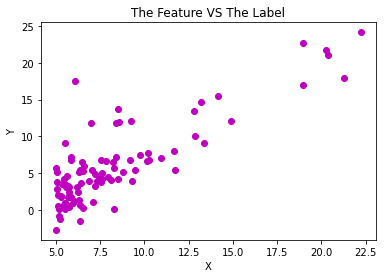

In [121]:
plt.scatter(df['X1'],df['Y'],c = 'm')
plt.title('The Feature VS The Label')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

- There are a lot of extreme values in the data.
- In General there are a positive correlation between the feature and the label. 

In [122]:
def cost_func(x,theta,y):
    '''
    This function for calculating the error between the actual and predicted values.
    INPUT:
    x: numpy.matrix. The feature.
    theta: numpy.matrix. The weights.
    y: numpy.matrix. The label.
    OUTPUT:
    The value of the error.
    '''
    return (1 / (2 * len(x))) * np.sum(np.power(((x * theta.T) - y),2))

In [123]:
def gradient_descent(x,theta,y,iterations = 1000,alpha = 0.001):
    '''
    This function for calculating the gradient descent.
    INPUT:
    x: numpy.matrix. The feature.
    theta: numpy.matrix. The initial weights.
    y: numpy.matrix. The label.
    iterations: int. The number of iterations.
    alpha: float. The learning rate.
    OUTPUT:
    The values of the thetas.
    '''
    tmp = np.matrix(np.zeros(theta.shape))
    for itr_num in range(iterations):
        error_val = (x * theta.T) - y
        for idx in range(theta.shape[1]):
            tmp[0,idx] = theta[0,idx] - ((alpha /len(x)) * np.sum(np.multiply(error_val,x[:,idx])))
        theta = tmp
    return theta

In [132]:
#Initializing theta
theta = np.matrix(np.array([0,0])) 
#The optimized theta
opt_theta = gradient_descent(x,theta,y,10000,0.01)

In [133]:
opt_theta

matrix([[-3.89578082,  1.19303364]])

In [134]:
#The cost value
cost_func(x,opt_theta,y)

4.476971375975179

In [139]:
#Predicted values
y_pred = x * opt_theta.T

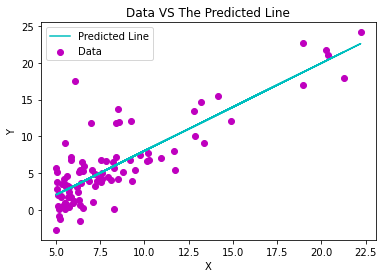

In [150]:
plt.scatter(df['X1'],df['Y'],label = 'Data',c = 'm')
plt.plot(df['X1'],np.array(y_pred),label = 'Predicted Line',c = 'c')
plt.title('Data VS The Predicted Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

- From the above shape, we can see that the predicted line fitted some data and that's good for these limited functions. 